<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
<li>Add a screenshot of the web-site that you will be scraping</li>



I will be extracting data from reklama5.mk which is website about second hand sales. I want to make overview datasets which will have columns like money, title, date, class and location. Maybe we can learn something about second hand sales in particilar locations or classes.

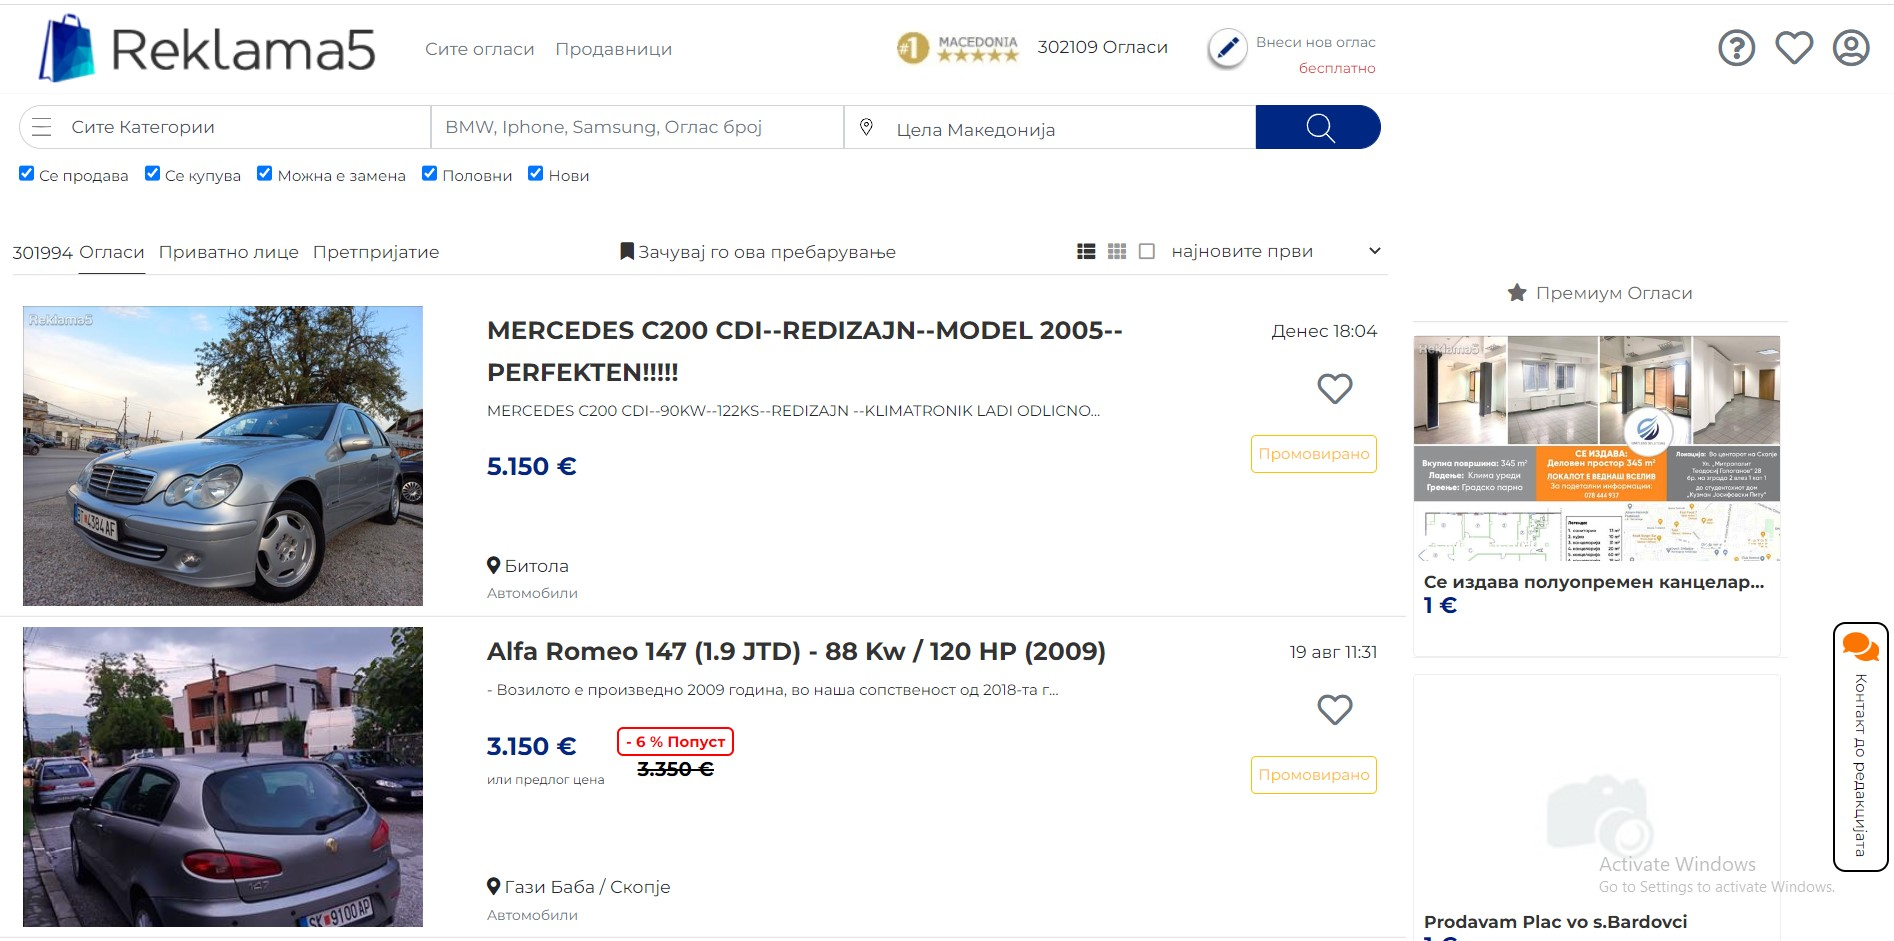

# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [35]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

# Setting up 'requests to make HTTPS requests properly takes some extra steps...
requests.packages.urllib3.disable_warnings()

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [2]:
snapshot = requests.get('https://reklama5.mk/Search')

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [3]:
snapshot

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [4]:
soup = BeautifulSoup(snapshot.text,'html.parser')

**Print the HTML code that you get**

In [ ]:
soup

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

attributes for my dataset

*   titles
*   prices
*   locations
*   categories








**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [12]:
#Extracting title class
print(soup.select_one('.ad-desc-div').select_one('h3').text)

#Extracting location class
print(soup.select_one('.city-span').text)

#Extracting price class
print(soup.select_one('.search-ad-price').text)

#Extracting category class
print(soup.select_one('.ad-category-div').text)

 BMW 750i

 Валандово
                                    

                                        2
 €                                    

Автомобили



**Add as many codeboxes as you need for selecting all the html elements**

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#The parent 
descriptions = soup.select('.ad-desc-div')
titles = []

#Extracting the titles
for i in range(0,len(descriptions)):
  titles.append(descriptions[i].select_one('h3').text)
titles

In [ ]:
#The parent 
cities_parent = soup.select('.city-span')
locations = []

#Extracting the data and removing unnecessary spaces
for i in range(0,len(cities_parent)):
  locations.append(cities_parent[i].text.strip())
locations

In [ ]:
#The parent 
prices_parent = soup.select('.search-ad-price')
prices = []

#Extracting the data and removing unnecessary spaces
for i in range(0,len(prices_parent)):
  prices.append(prices_parent[i].text.strip().replace('\r\n',''))
prices

In [ ]:
#The parent 
categories_parent = soup.select('.ad-category-div')
categories = []

#Extracting the data and removing unnecessary spaces
for i in range(0,len(categories_parent)):
  categories.append(categories_parent[i].text.strip())
categories

**Print all lists that are containing the elements**

In [ ]:
titles

In [ ]:
locations

In [ ]:
prices

In [ ]:
categories

**Check if all lists are the same size**

In [ ]:
len(titles) == len(locations) == len(prices) == len(categories)

True

# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [10]:
df = pd.DataFrame({"Title": titles,
                   "Location": locations,
                   "Price": prices,
                   "Category": categories})

**Print the dataset you obtain**

In [11]:
df

,Title,Location,Price,Category
0,BMW 750i,Валандово,2 €,Автомобили
1,klucar kluc klucevi brava mercedes sprinter v...,Скопје Центар / Скопје,4.000 МКД,Авто делови и Авто Опрема / Резервни делови
2,SE PRODAVA CF MOTO NK 400,Скопје Центар / Скопје,4.200 €,Мотори (над 50 cc)
3,Audi A6 3.0 quattro 224hp,Штип,6.300 €,Автомобили
4,NIKE trenerki,Кисела Вода / Скопје,2.500 МКД,Фитнес / Вежбање / Облека
5,Polovni zimski gumi 205.55.16,Кочани,6.000 МКД,Авто делови и Авто Опрема / Останато
6,VW Passat 2.0 High line TDI vo odlicna sostojba,Скопје Центар / Скопје,13.500 €,Автомобили
7,Debar Maalo: Deloven prostor / stan na prizem...,Скопје Центар / Скопје,650 €,Станови
8,СТОП за 'РЧЕЊЕ и НОЌНА АПНЕА (stop za RCENJE ...,Кичево,290 МКД,Медицински материјали / Медицински производи
9,Video nadzor so WI-FI KAMERI i sledenje vo zi...,Пробиштип,2.290 МКД,Безбедност и безбедносна опрема / Видео надзор


# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results


In [38]:
wd = webdriver.Chrome(options=options)
wd.get("https://play.google.com/store/movies?hl=en&gl=US")
#print(wd.page_source)  # results
# curent_title = wd.find_element(By.CSS_SELECTOR, '.Fd93Bb.F5UCq.xwcR9d')
# curent_title.find_element(By.TAG_NAME, 'span')
# titles.append(curent_title.text)
# curent_reviews = wd.find_element(By.CSS_SELECTOR, '.g1rdde')
# reviews.append(curent_reviews.text)
# print(titles)
# print(reviews)
# button = wd.find_element(By.CSS_SELECTOR, '.VfPpkd-LgbsSe.VfPpkd-LgbsSe-OWXEXe-dgl2Hf.ksBjEc.lKxP2d.LQeN7.x0t5t')
# button.click
movies = wd.find_elements(By.CLASS_NAME,'Si6A0c')
print(movies[0].get_attribute('href'))
links = []
for i in range(0,6):
  links.append(movies[i].get_attribute('href'))
items=[]
for link in links:
  wd.get(link)
  item={}

  title = wd.find_element(By.CSS_SELECTOR,'h1[itemprop="name"]').text
  item['Title'] = title
  curent_reviews = wd.find_element(By.CSS_SELECTOR, '.g1rdde').text
  item["Reviews"] = curent_reviews
  items.append(item)

df = pd.DataFrame(items)
df
  

https://play.google.com/store/movies/details/Bullet_Train?id=IE8cncuxU1w.P


,Title,Reviews
0,Bullet Train,58 reviews
1,Top Gun: Maverick,792 reviews
2,The Invitation,9 reviews
3,Clerks III,20 reviews
4,Barbarian,Rating
5,The Retaliators,Tomatometer
